In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

### **Tarea:**

Aplica los modelos de agrupamiento presentados a los conjuntos Iris y Digits; compara los resultados de cada uno de ellos.

Datos iris

In [77]:
# Función para visualizar los resultados
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=label)
        plt.xlabel("Componente Principal 1")
        plt.ylabel("Componente Principal 2")
    plt.title(title)
    plt.legend()
    plt.show()

In [78]:
# Cargar el conjunto de datos iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [79]:
# Reducir la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [80]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

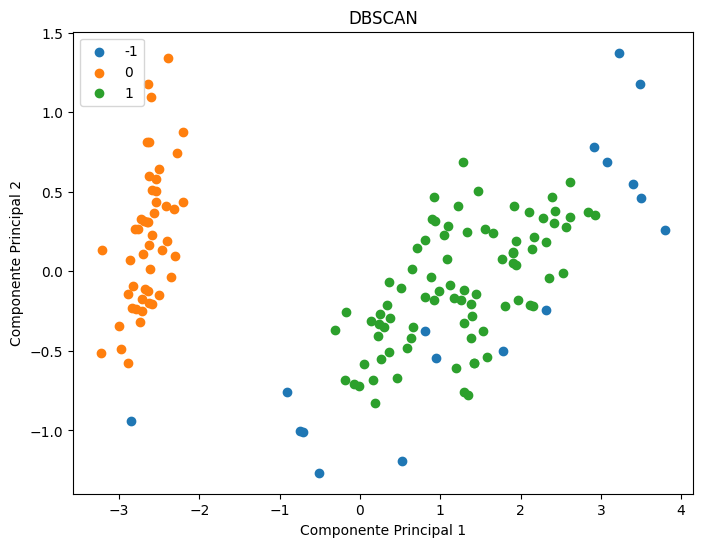

In [81]:
plot_clusters(X_pca, dbscan_labels, "DBSCAN")

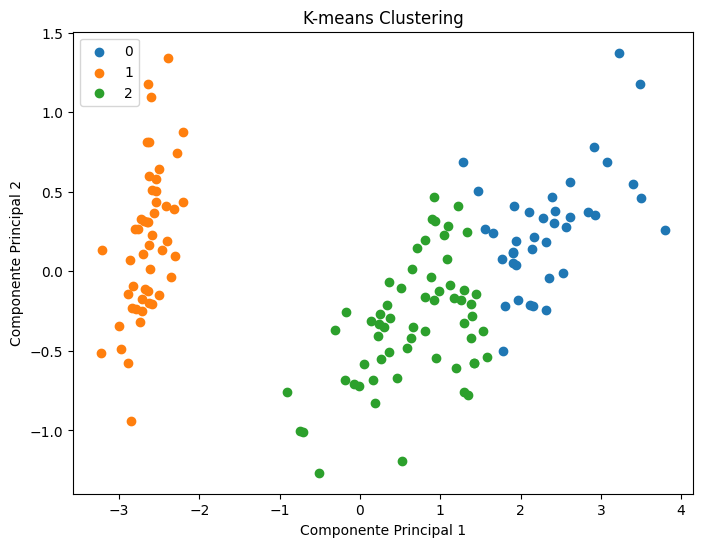

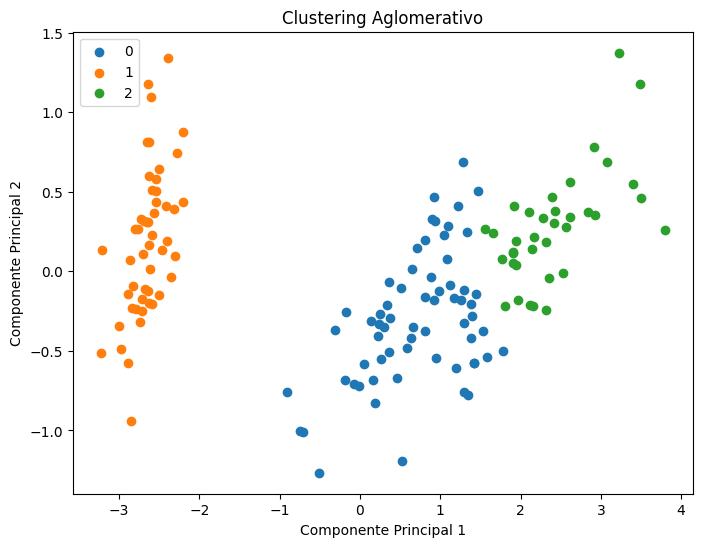

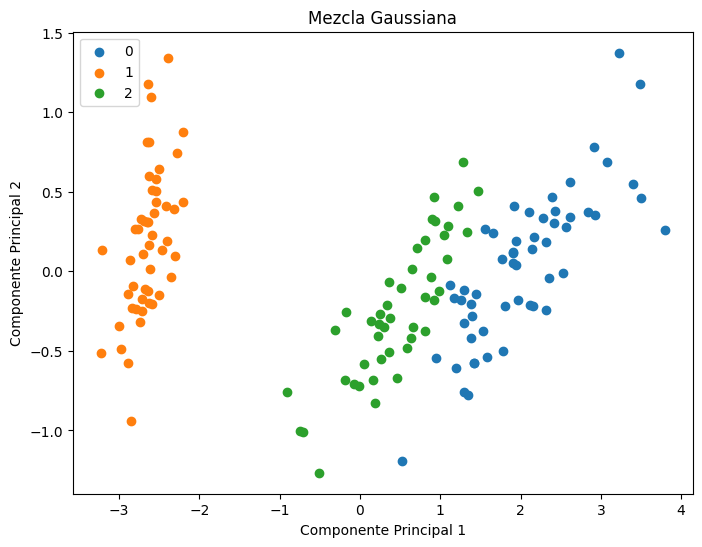

In [82]:
# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Aplicar Clustering Aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)

# Aplicar Mezcla Gaussiana
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Visualizar los resultados
plot_clusters(X_pca, kmeans_labels, "K-means Clustering")
plot_clusters(X_pca, agg_labels, "Clustering Aglomerativo")
plot_clusters(X_pca, gmm_labels, "Mezcla Gaussiana")

Datos digits

In [83]:
# Función para visualizar los resultados
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=label)
    plt.title(title)
    plt.legend()
    plt.show()

In [84]:
X, y = datasets.load_digits(return_X_y=True)
(n_samples, n_features), n_digits = X.shape, np.unique(y).size
print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [85]:
# Reducir la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [86]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=25, min_samples=8)
dbscan_labels = dbscan.fit_predict(X)
# X = X_pca[dbscan_labels != -1]
dbscan_labels

array([ 0,  1, -1, ...,  1,  1, -1])

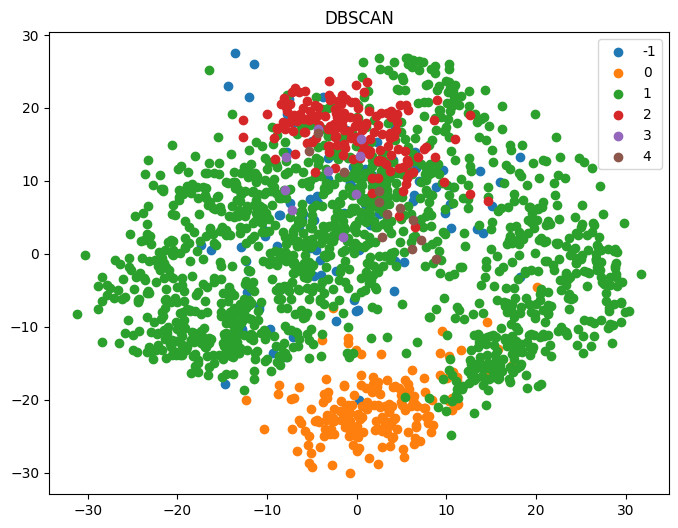

In [87]:
plot_clusters(X_pca, dbscan_labels, "DBSCAN")

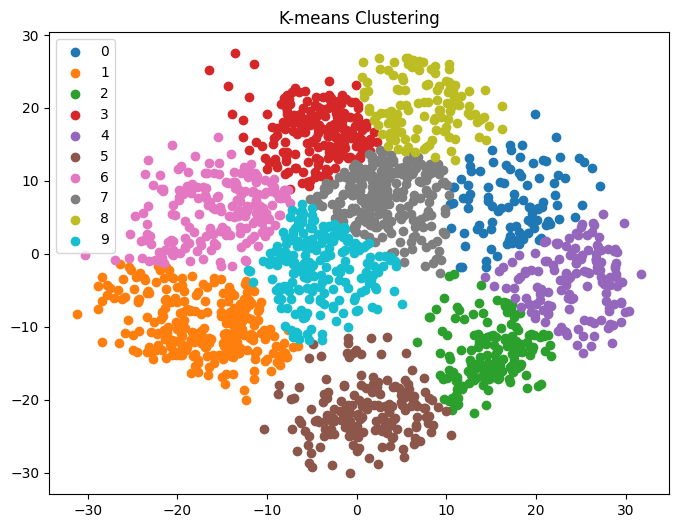

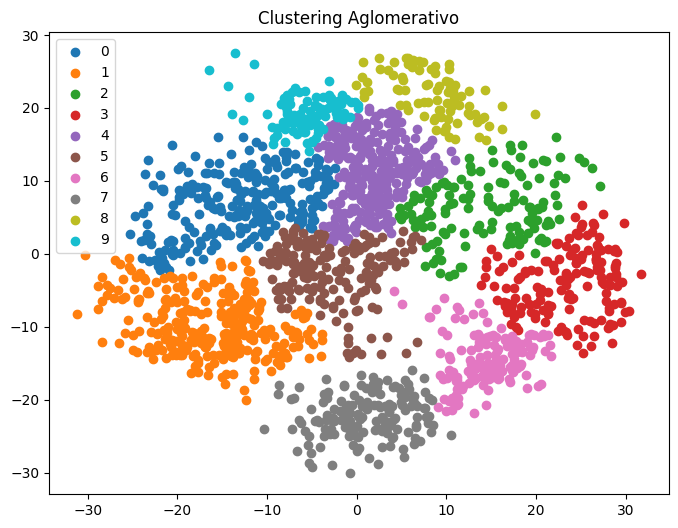

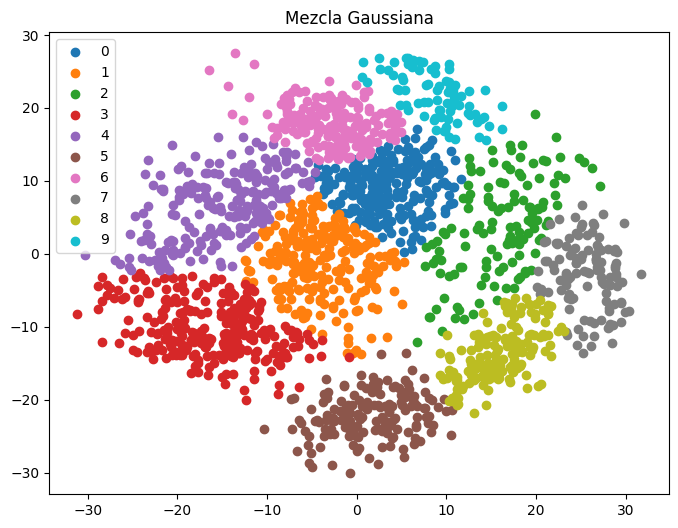

In [88]:
# Aplicar K-means
kmeans = KMeans(n_clusters=n_digits, init='k-means++')
kmeans_labels = kmeans.fit_predict(X_pca)

# Aplicar Clustering Aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=n_digits, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(X_pca)

# Aplicar Mezcla Gaussiana
gmm = GaussianMixture(n_components=n_digits, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# Visualizar los resultados
plot_clusters(X_pca, kmeans_labels, "K-means Clustering")
plot_clusters(X_pca, agg_labels, "Clustering Aglomerativo")
plot_clusters(X_pca, gmm_labels, "Mezcla Gaussiana")

PCA time:  0.23327112197875977


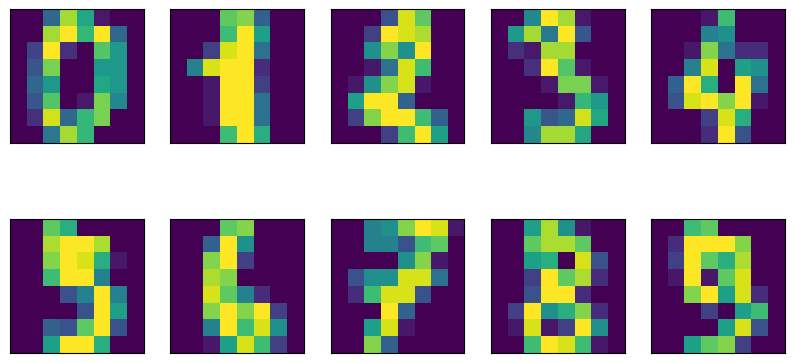

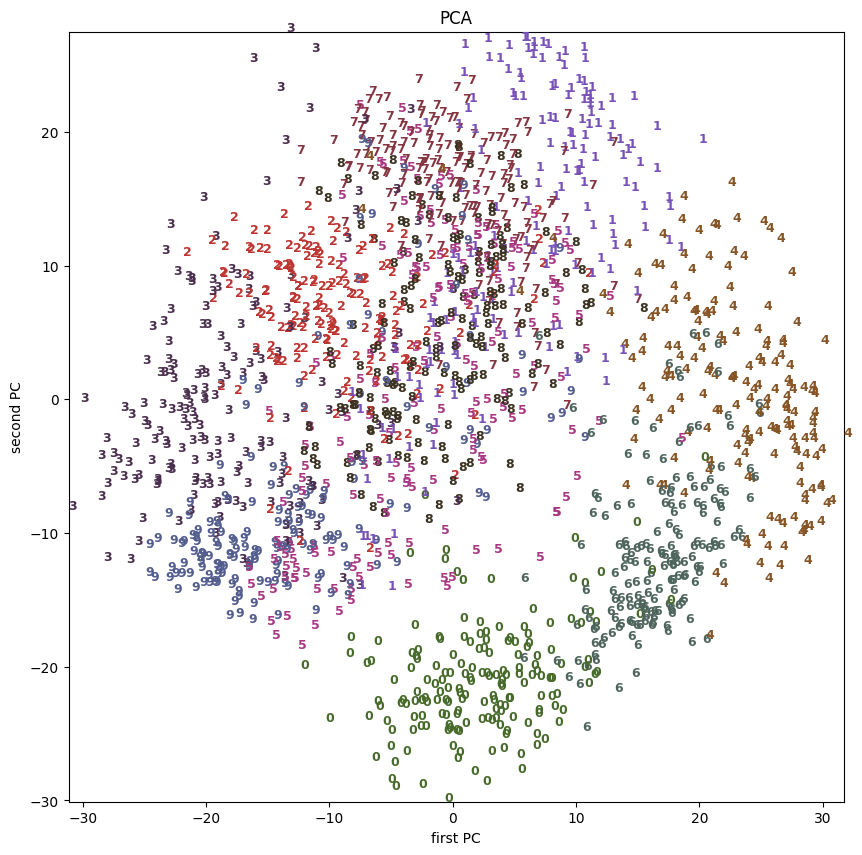

k-MEANS time:  0.039246320724487305


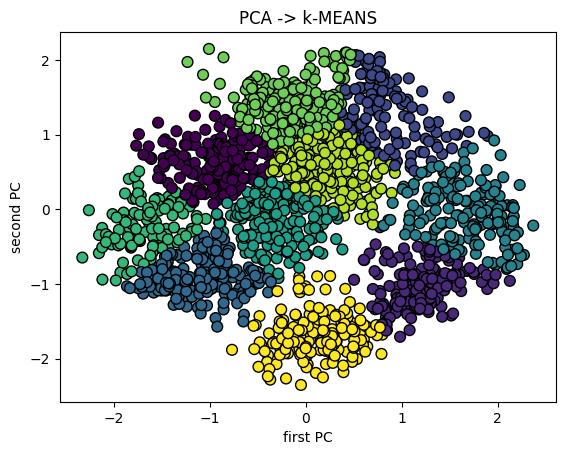

[9 2 8 ... 8 3 5]


In [ ]:
# Codigo de comprobacion
from time import time
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

# print len(digits.data) # 1797
colors = ["#476A2A","#7851B8",'#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E']

t0=time()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA')
plt.xlabel("first PC")
plt.ylabel("second PC")
print ("PCA time: ", time()-t0)
plt.show()

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(digits_pca)
scaled_p = scaler.transform(digits_pca)



#PCA -> k-MEANS
t3 = time()
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(scaled_p)

plt.scatter(scaled_p[:,0], scaled_p[:,1], c=labels_km, s=60, edgecolors='black')
plt.title('PCA -> k-MEANS')
plt.xlabel("first PC")
plt.ylabel("second PC")
print ("k-MEANS time: ", time()-t3)
plt.show()

print (labels_km)